In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [70]:
df=pd.read_csv("train.csv")

In [71]:
df.head()

Id         groupId         matchId  assists  boosts  \
0  d5ef0e51d2f7cc  6201db6524addd  0abd54baf538f9        0       1   
1  796c77b15772e8  2f4ba5d01e8b61  4a80eaf5b09cb1        0       4   
2  361fd477c3416d  5828bdb4d84060  510e6e0b2db210        0       0   
3  3fc327f32d280f  1b9fc490905dd3  17cc47b32e11a1        0       0   
4  c26074655d0194  7c0636aeac7d3e  d321e78bae0840        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0        186.0      0              0      0         43  ...        0   
1        353.8      2              1      7          4  ...        1   
2          0.0      0              0      1         65  ...        0   
3          0.0      0              0      0         85  ...        0   
4        119.7      2              0      0         18  ...        0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0           0.0          0           0.0          0               0   
1        1877.0          0           0.0          0               0   
2           0.0          0           0.0          0               0   
3           0.0          0           0.0          0               0   
4           0.0          0           0.0          0               0   

   walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0         74.32                2          0        0.2604  
1       1732.00                4          0        0.7045  
2         75.47                1       1694        0.2692  
3        153.50                2          0        0.1034  
4        194.20                4          0        0.1923  

[5 rows x 29 columns]

In [72]:
df.describe()

assists        boosts   damageDealt         DBNOs  headshotKills  \
count  2.979467e+06  2.979467e+06  2.979467e+06  2.979467e+06   2.979467e+06   
mean   2.338042e-01  1.107719e+00  1.307676e+02  6.580959e-01   2.270379e-01   
std    5.881412e-01  1.716574e+00  1.708132e+02  1.145698e+00   6.024485e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
50%    0.000000e+00  0.000000e+00  8.437000e+01  0.000000e+00   0.000000e+00   
75%    0.000000e+00  2.000000e+00  1.860000e+02  1.000000e+00   0.000000e+00   
max    2.200000e+01  2.800000e+01  5.990000e+03  5.300000e+01   6.400000e+01   

              heals     killPlace    killPoints         kills   killStreaks  \
count  2.979467e+06  2.979467e+06  2.979467e+06  2.979467e+06  2.979467e+06   
mean   1.371245e+00  4.758193e+01  5.050374e+02  9.255350e-01  5.443259e-01   
std    2.680303e+00  2.746205e+01  6.275943e+02  1.559334e+00  7.109235e-01   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  2.400000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  4.700000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
75%    2.000000e+00  7.100000e+01  1.172000e+03  1.000000e+00  1.000000e+00   
max    7.300000e+01  1.010000e+02  2.154000e+03  7.200000e+01  2.000000e+01   

       ...       revives  rideDistance     roadKills  swimDistance  \
count  ...  2.979467e+06  2.979467e+06  2.979467e+06  2.979467e+06   
mean   ...  1.648241e-01  6.066944e+02  3.475118e-03  4.512207e+00   
std    ...  4.727409e-01  1.498534e+03  7.268309e-02  3.046553e+01   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    ...  0.000000e+00  4.058000e-01  0.000000e+00  0.000000e+00   
max    ...  3.900000e+01  4.071000e+04  1.400000e+01  3.514000e+03   

          teamKills  vehicleDestroys  walkDistance  weaponsAcquired  \
count  2.979467e+06     2.979467e+06  2.979467e+06     2.979467e+06   
mean   2.383614e-02     7.916517e-03  1.154899e+03     3.660597e+00   
std    1.674755e-01     9.271241e-02  1.183850e+03     2.456606e+00   
min    0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00   
25%    0.000000e+00     0.000000e+00  1.553000e+02     2.000000e+00   
50%    0.000000e+00     0.000000e+00  6.865000e+02     3.000000e+00   
75%    0.000000e+00     0.000000e+00  1.978000e+03     5.000000e+00   
max    1.200000e+01     5.000000e+00  2.578000e+04     2.360000e+02   

          winPoints  winPlacePerc  
count  2.979467e+06  2.979466e+06  
mean   6.064248e+02  4.729253e-01  
std    7.397088e+02  3.074121e-01  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  2.000000e-01  
50%    0.000000e+00  4.583000e-01  
75%    1.495000e+03  7.407000e-01  
max    2.002000e+03  1.000000e+00  

[8 rows x 25 columns]

In [73]:
print(df["killPoints"].mean())
print(df["winPoints"].mean())
print(df["rankPoints"].mean())

505.0374093755695
606.4247605360288
892.0222627067191


In [74]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [75]:
df.drop(axis="rows",labels=df.index[df["winPlacePerc"].isna()],inplace=True)

In [76]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [77]:
df

Id         groupId         matchId  assists  boosts  \
0        d5ef0e51d2f7cc  6201db6524addd  0abd54baf538f9        0       1   
1        796c77b15772e8  2f4ba5d01e8b61  4a80eaf5b09cb1        0       4   
2        361fd477c3416d  5828bdb4d84060  510e6e0b2db210        0       0   
3        3fc327f32d280f  1b9fc490905dd3  17cc47b32e11a1        0       0   
4        c26074655d0194  7c0636aeac7d3e  d321e78bae0840        0       0   
...                 ...             ...             ...      ...     ...   
2979462  fb5c522cb1a9eb  f02bf0eeac85ea  86032b4e374c74        0       8   
2979463  fab9d9a7726b60  115a85181a2a0b  84bf0c2075b8b7        0       1   
2979464  6f609b3e78df51  9fc1a2628c980a  8e6aee43c09e08        0       0   
2979465  89604bf95ea5a2  1dbf697dad19e4  f2672978cc29d6        0       1   
2979466  93e57670813f8e  f657902761e60c  b069f2b87d75f9        0       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0             186.00      0              0      0         43  ...        0   
1             353.80      2              1      7          4  ...        1   
2               0.00      0              0      1         65  ...        0   
3               0.00      0              0      0         85  ...        0   
4             119.70      2              0      0         18  ...        0   
...              ...    ...            ...    ...        ...  ...      ...   
2979462        29.83      0              0      2         41  ...        0   
2979463         0.00      0              0      4         61  ...        0   
2979464         0.00      0              0      0         84  ...        0   
2979465       386.20      1              0      1          9  ...        0   
2979466        50.31      0              0      0         48  ...        0   

         rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0                0.00          0           0.0          0               0   
1             1877.00          0           0.0          0               0   
2                0.00          0           0.0          0               0   
3                0.00          0           0.0          0               0   
4                0.00          0           0.0          0               0   
...               ...        ...           ...        ...             ...   
2979462          0.00          0           0.0          0               0   
2979463         86.49          0           0.0          0               0   
2979464          0.00          0           0.0          0               0   
2979465          0.00          0           0.0          0               0   
2979466          0.00          0         181.5          0               0   

         walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0               74.32                2          0        0.2604  
1             1732.00                4          0        0.7045  
2               75.47                1       1694        0.2692  
3              153.50                2          0        0.1034  
4              194.20                4          0        0.1923  
...               ...              ...        ...           ...  
2979462       2052.00                5          0        0.9231  
2979463       1053.00                3          0        0.4211  
2979464          0.00                0          0        0.0000  
2979465       2026.00                6          0        0.7111  
2979466       1676.00                5          0        0.8125  

[2979466 rows x 29 columns]

In [78]:
df.loc[df.rankPoints>-1]

Id         groupId         matchId  assists  boosts  \
0        d5ef0e51d2f7cc  6201db6524addd  0abd54baf538f9        0       1   
1        796c77b15772e8  2f4ba5d01e8b61  4a80eaf5b09cb1        0       4   
3        3fc327f32d280f  1b9fc490905dd3  17cc47b32e11a1        0       0   
4        c26074655d0194  7c0636aeac7d3e  d321e78bae0840        0       0   
6        3428eb76d71157  fc63223ccda112  af119429bc890b        1       0   
...                 ...             ...             ...      ...     ...   
2979462  fb5c522cb1a9eb  f02bf0eeac85ea  86032b4e374c74        0       8   
2979463  fab9d9a7726b60  115a85181a2a0b  84bf0c2075b8b7        0       1   
2979464  6f609b3e78df51  9fc1a2628c980a  8e6aee43c09e08        0       0   
2979465  89604bf95ea5a2  1dbf697dad19e4  f2672978cc29d6        0       1   
2979466  93e57670813f8e  f657902761e60c  b069f2b87d75f9        0       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0             186.00      0              0      0         43  ...        0   
1             353.80      2              1      7          4  ...        1   
3               0.00      0              0      0         85  ...        0   
4             119.70      2              0      0         18  ...        0   
6              87.90      0              0      0         74  ...        0   
...              ...    ...            ...    ...        ...  ...      ...   
2979462        29.83      0              0      2         41  ...        0   
2979463         0.00      0              0      4         61  ...        0   
2979464         0.00      0              0      0         84  ...        0   
2979465       386.20      1              0      1          9  ...        0   
2979466        50.31      0              0      0         48  ...        0   

         rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0                0.00          0           0.0          0               0   
1             1877.00          0           0.0          0               0   
3                0.00          0           0.0          0               0   
4                0.00          0           0.0          0               0   
6              151.80          0           0.0          0               0   
...               ...        ...           ...        ...             ...   
2979462          0.00          0           0.0          0               0   
2979463         86.49          0           0.0          0               0   
2979464          0.00          0           0.0          0               0   
2979465          0.00          0           0.0          0               0   
2979466          0.00          0         181.5          0               0   

         walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0               74.32                2          0        0.2604  
1             1732.00                4          0        0.7045  
3              153.50                2          0        0.1034  
4              194.20                4          0        0.1923  
6              379.90                3          0        0.1852  
...               ...              ...        ...           ...  
2979462       2052.00                5          0        0.9231  
2979463       1053.00                3          0        0.4211  
2979464          0.00                0          0        0.0000  
2979465       2026.00                6          0        0.7111  
2979466       1676.00                5          0        0.8125  

[1839451 rows x 29 columns]

In [79]:
df.loc[df["rankPoints"]==-1,"rankPoints"]=np.nan
df.loc[((df["rankPoints"]!=-1) & (df["killPoints"]==0)),"killPoints"]=np.nan#df["killPoints"].mean()
df.loc[((df["rankPoints"]!=-1) & (df["winPoints"]==0)),"winPoints"]=np.nan#df["winPoints"].mean()

In [80]:
df.isna().sum()

Id                       0
groupId                  0
matchId                  0
assists                  0
boosts                   0
damageDealt              0
DBNOs                    0
headshotKills            0
heals                    0
killPlace                0
killPoints         1779375
kills                    0
killStreaks              0
longestKill              0
matchDuration            0
matchType                0
maxPlace                 0
numGroups                0
rankPoints         1140015
revives                  0
rideDistance             0
roadKills                0
swimDistance             0
teamKills                0
vehicleDestroys          0
walkDistance             0
weaponsAcquired          0
winPoints          1779375
winPlacePerc             0
dtype: int64

In [81]:
print(df["killPoints"].mean())
print(df["winPoints"].mean())
print(df["rankPoints"].mean())

1253.8568283571828
1505.5712958433985
1445.479839365115


In [82]:
df.loc[df["killPoints"].isna(),"killPoints"]=df["killPoints"].mean()
df.loc[df["winPoints"].isna(),"winPoints"]=df["winPoints"].mean()
df.loc[df["rankPoints"].isna(),"rankPoints"]=df["rankPoints"].mean()

In [83]:
testdf=df

In [84]:
testdf.nunique()

Id                 2979466
groupId            1681662
matchId              47964
assists                 18
boosts                  25
damageDealt          28172
DBNOs                   37
headshotKills           30
heals                   59
killPlace              101
killPoints            1648
kills                   54
killStreaks             16
longestKill          27117
matchDuration         1266
matchType               16
maxPlace                99
numGroups              100
rankPoints            2075
revives                 24
rideDistance         30768
roadKills               13
swimDistance         26362
teamKills               11
vehicleDestroys          6
walkDistance         36933
weaponsAcquired         91
winPoints             1362
winPlacePerc          2923
dtype: int64

In [85]:
testdf["matchType"].unique()

array(['solo-fpp', 'duo', 'squad', 'squad-fpp', 'duo-fpp', 'solo',
       'normal-duo-fpp', 'normal-squad-fpp', 'crashfpp', 'flarefpp',
       'normal-solo-fpp', 'flaretpp', 'normal-duo', 'normal-squad',
       'normal-solo', 'crashtpp'], dtype=object)

In [86]:
lbl_encodr=LabelEncoder()
new_type=lbl_encodr.fit_transform(testdf["matchType"])
new_type

array([13,  2, 14, ..., 15,  2, 13])

In [87]:
df["matchType"]

0           solo-fpp
1                duo
2              squad
3          squad-fpp
4          squad-fpp
             ...    
2979462        squad
2979463         solo
2979464    squad-fpp
2979465          duo
2979466     solo-fpp
Name: matchType, Length: 2979466, dtype: object

In [88]:
testdf["matchType"]=new_type
testdf["matchType"].head()

0    13
1     2
2    14
3    15
4    15
Name: matchType, dtype: int64

In [89]:
new_type=lbl_encodr.fit_transform(testdf["groupId"])
new_type

array([ 645364,  311343,  580803, ..., 1050496,  195710, 1618330])

In [90]:
testdf["groupId"]=new_type
testdf.head()

Id  groupId         matchId  assists  boosts  damageDealt  \
0  d5ef0e51d2f7cc   645364  0abd54baf538f9        0       1        186.0   
1  796c77b15772e8   311343  4a80eaf5b09cb1        0       4        353.8   
2  361fd477c3416d   580803  510e6e0b2db210        0       0          0.0   
3  3fc327f32d280f   181474  17cc47b32e11a1        0       0          0.0   
4  c26074655d0194   816158  d321e78bae0840        0       0        119.7   

   DBNOs  headshotKills  heals  killPlace  ...  revives  rideDistance  \
0      0              0      0         43  ...        0           0.0   
1      2              1      7          4  ...        1        1877.0   
2      0              0      1         65  ...        0           0.0   
3      0              0      0         85  ...        0           0.0   
4      2              0      0         18  ...        0           0.0   

   roadKills  swimDistance  teamKills  vehicleDestroys  walkDistance  \
0          0           0.0          0                0         74.32   
1          0           0.0          0                0       1732.00   
2          0           0.0          0                0         75.47   
3          0           0.0          0                0        153.50   
4          0           0.0          0                0        194.20   

   weaponsAcquired    winPoints  winPlacePerc  
0                2  1505.571296        0.2604  
1                4  1505.571296        0.7045  
2                1  1694.000000        0.2692  
3                2  1505.571296        0.1034  
4                4  1505.571296        0.1923  

[5 rows x 29 columns]

In [91]:
new_type=lbl_encodr.fit_transform(testdf["matchId"])
testdf["matchId"]=new_type
testdf.head()

Id  groupId  matchId  assists  boosts  damageDealt  DBNOs  \
0  d5ef0e51d2f7cc   645364     1976        0       1        186.0      0   
1  796c77b15772e8   311343    13894        0       4        353.8      2   
2  361fd477c3416d   580803    15093        0       0          0.0      0   
3  3fc327f32d280f   181474     4360        0       0          0.0      0   
4  c26074655d0194   816158    39502        0       0        119.7      2   

   headshotKills  heals  killPlace  ...  revives  rideDistance  roadKills  \
0              0      0         43  ...        0           0.0          0   
1              1      7          4  ...        1        1877.0          0   
2              0      1         65  ...        0           0.0          0   
3              0      0         85  ...        0           0.0          0   
4              0      0         18  ...        0           0.0          0   

   swimDistance  teamKills  vehicleDestroys  walkDistance  weaponsAcquired  \
0           0.0          0                0         74.32                2   
1           0.0          0                0       1732.00                4   
2           0.0          0                0         75.47                1   
3           0.0          0                0        153.50                2   
4           0.0          0                0        194.20                4   

     winPoints  winPlacePerc  
0  1505.571296        0.2604  
1  1505.571296        0.7045  
2  1694.000000        0.2692  
3  1505.571296        0.1034  
4  1505.571296        0.1923  

[5 rows x 29 columns]

In [92]:
new_type=lbl_encodr.fit_transform(testdf["Id"])
testdf["Id"]=new_type
testdf.head()

Id  groupId  matchId  assists  boosts  damageDealt  DBNOs  \
0  2489947   645364     1976        0       1        186.0      0   
1  1412740   311343    13894        0       4        353.8      2   
2   628654   580803    15093        0       0          0.0      0   
3   740829   181474     4360        0       0          0.0      0   
4  2262435   816158    39502        0       0        119.7      2   

   headshotKills  heals  killPlace  ...  revives  rideDistance  roadKills  \
0              0      0         43  ...        0           0.0          0   
1              1      7          4  ...        1        1877.0          0   
2              0      1         65  ...        0           0.0          0   
3              0      0         85  ...        0           0.0          0   
4              0      0         18  ...        0           0.0          0   

   swimDistance  teamKills  vehicleDestroys  walkDistance  weaponsAcquired  \
0           0.0          0                0         74.32                2   
1           0.0          0                0       1732.00                4   
2           0.0          0                0         75.47                1   
3           0.0          0                0        153.50                2   
4           0.0          0                0        194.20                4   

     winPoints  winPlacePerc  
0  1505.571296        0.2604  
1  1505.571296        0.7045  
2  1694.000000        0.2692  
3  1505.571296        0.1034  
4  1505.571296        0.1923  

[5 rows x 29 columns]

In [93]:
testdf.index[testdf.duplicated()]

Int64Index([], dtype='int64')

In [94]:
testdf.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [95]:
testdfnum=testdf.drop(axis="columns",labels=["Id","groupId","matchId","matchType"])
testdfcat=testdf.drop(axis="columns",labels=testdfnum.columns.to_list())

In [96]:
sns.set(rc={'figure.figsize':(6,5)})

assists


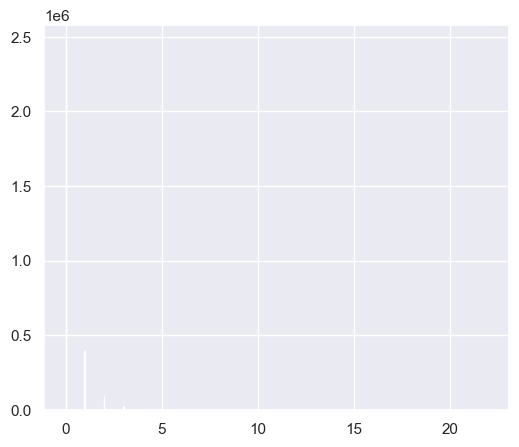

boosts


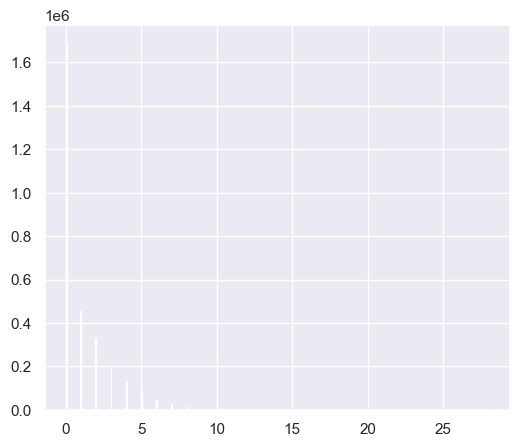

damageDealt


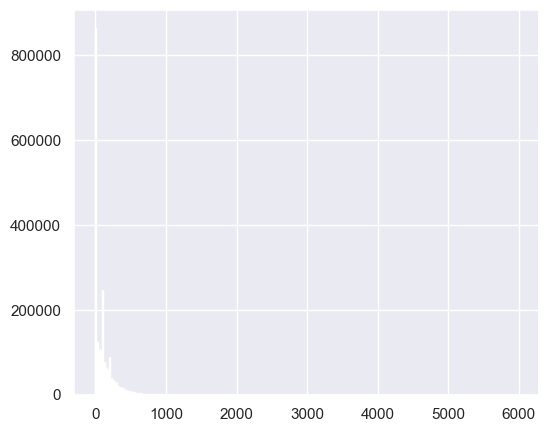

DBNOs


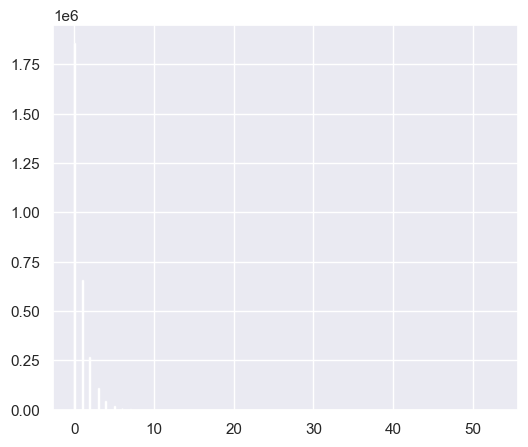

headshotKills


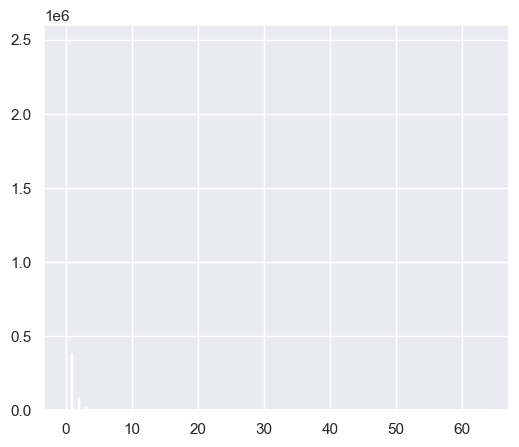

heals


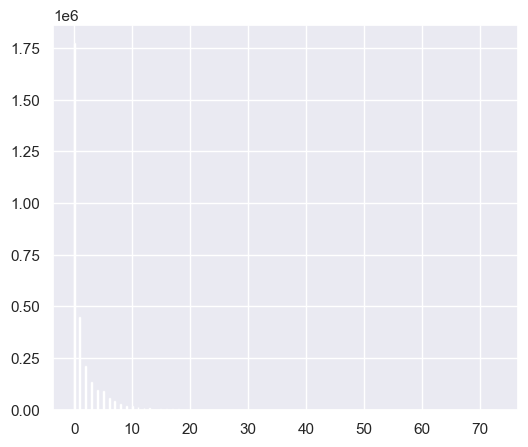

killPlace


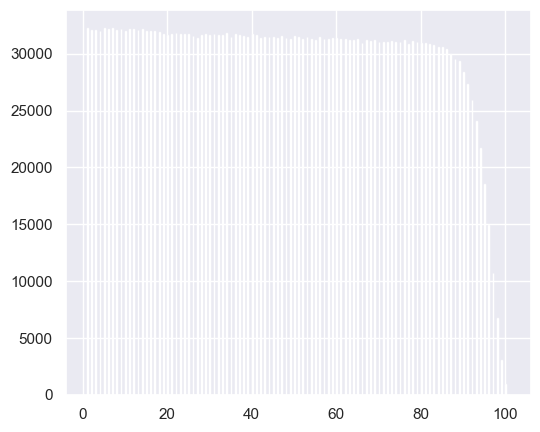

killPoints


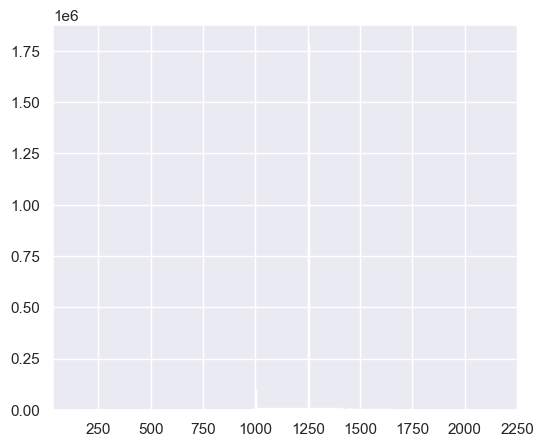

kills


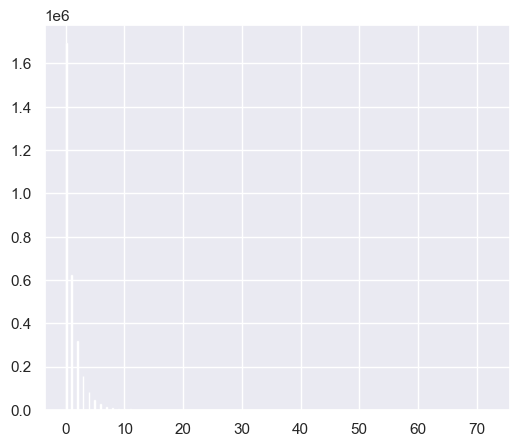

killStreaks


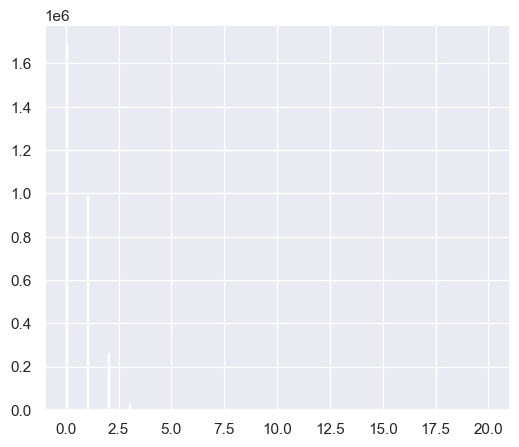

longestKill


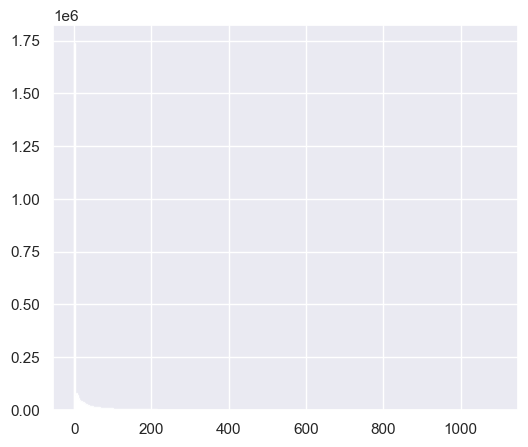

matchDuration


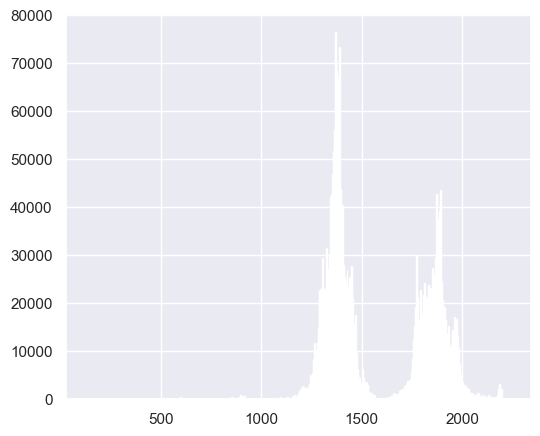

maxPlace


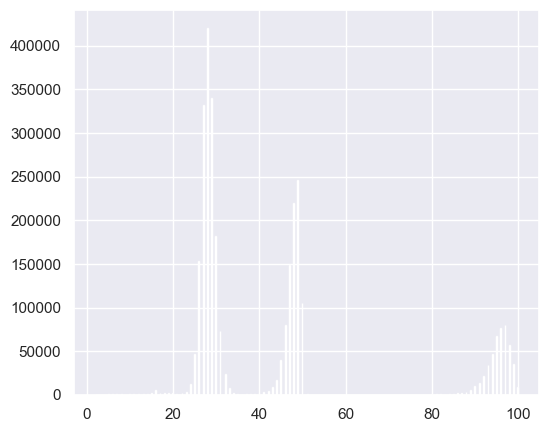

numGroups


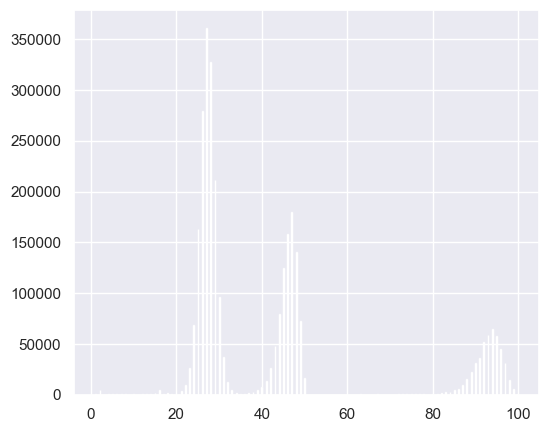

rankPoints


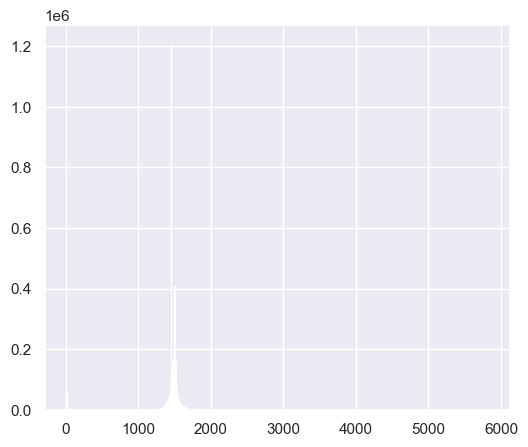

revives


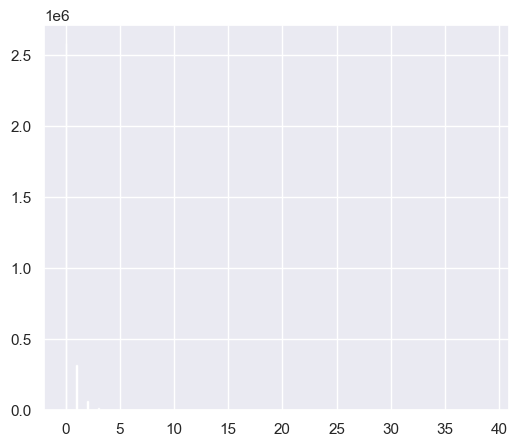

rideDistance


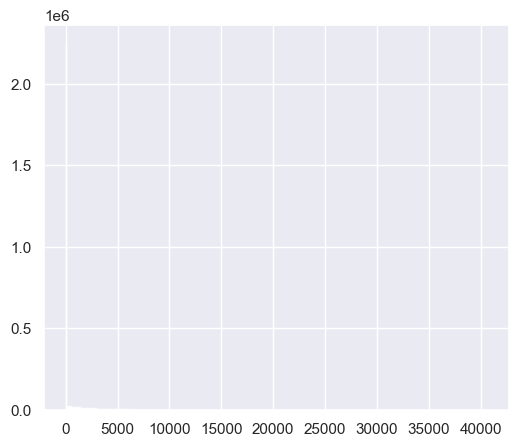

roadKills


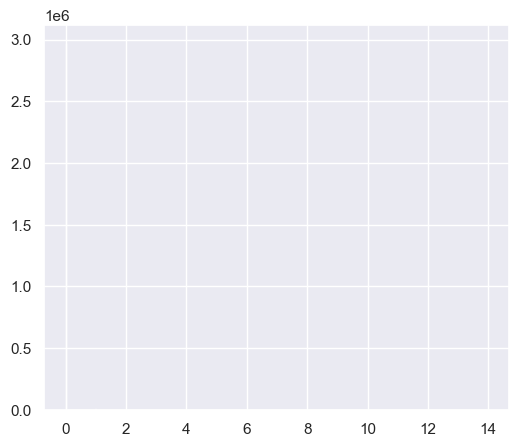

swimDistance


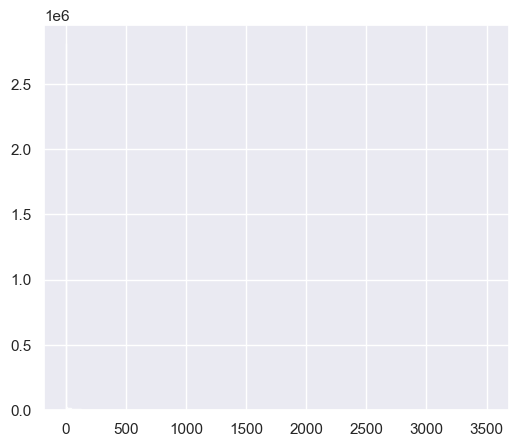

teamKills


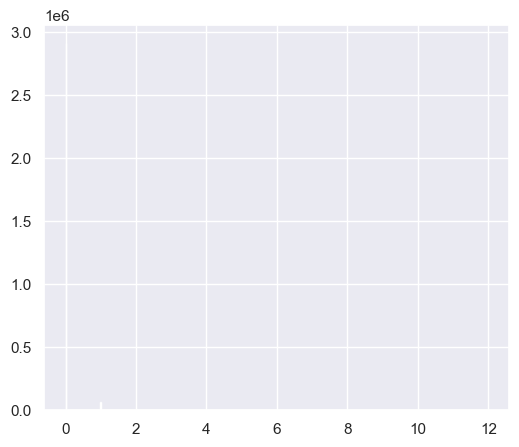

vehicleDestroys


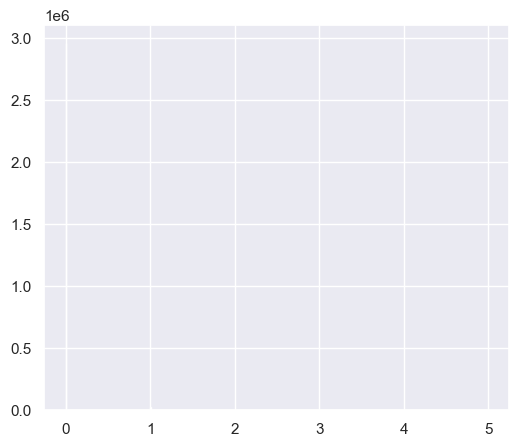

walkDistance


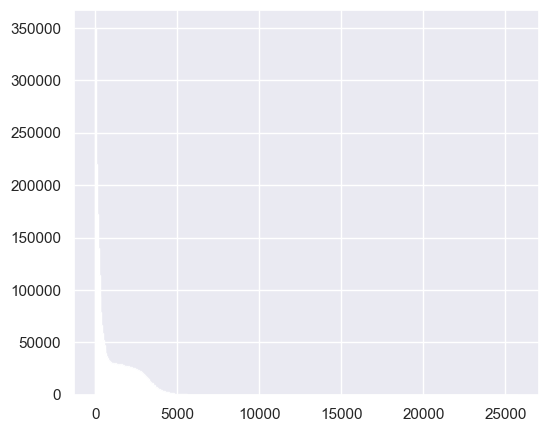

weaponsAcquired


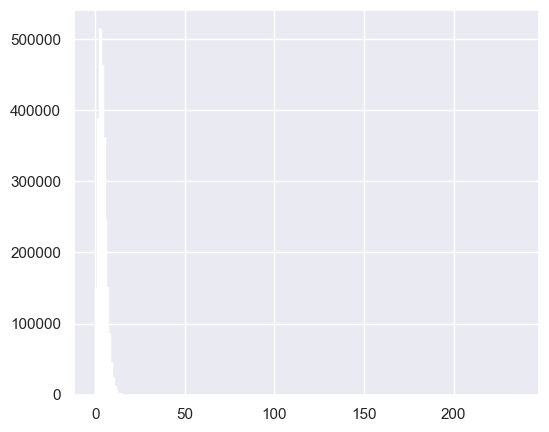

winPoints


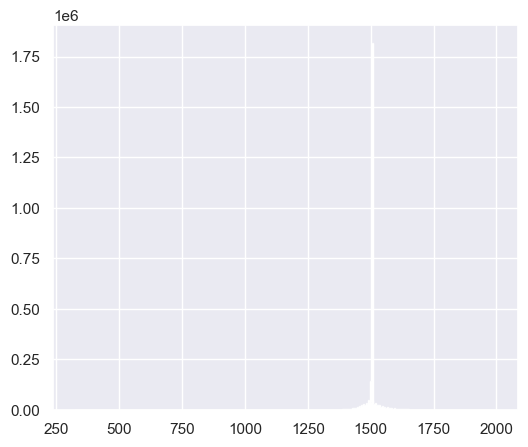

winPlacePerc


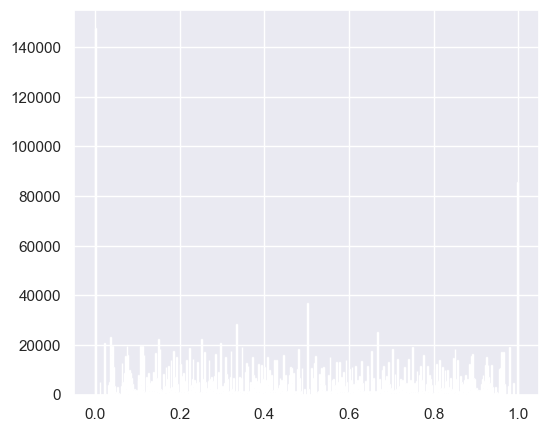

In [97]:
for i in testdfnum.columns:
    plt.hist(testdf[i],bins=500)
    print(i)
    plt.show()

In [98]:
#plt.hist(np.power(testdf["matchDuration"],2),bins=500)
#plt.show()

In [99]:
#testdf_cont=testdfnum.drop(axis="columns",labels=["matchDuration","winPlacePerc"])
#for i in testdf_cont.columns:
#    plt.hist(np.power(testdf_cont[i],1/2.05),bins=500)
#    print(i)
#    plt.show()
#    testdf[i]=np.power(testdf_cont[i],1/2.05)

In [100]:
#testdf_new=pd.DataFrame()
#testdf_new["damageDealt"]=testdf["damageDealt"]
#testdf_new["walkDistance"]=testdf["walkDistance"]
#testdf_new["weaponsAcquired"]=testdf["weaponsAcquired"]

In [101]:
#testdf_new

In [102]:
#for i in testdf_new.columns:
#    plt.hist(np.power(testdf_new[i],1/2),bins=500)
#    print(i)
#    plt.show()
#    testdf[i]=np.power(testdf_new[i],1/2)

In [103]:
#testdf["matchDuration"]=np.power(testdf["matchDuration"],2)

#for i in testdf_cont.columns:
#    testdf[i]=testdf_cont[i]

#for i in testdf_new.columns:
#    testdf[i]=testdf_new[i]

#testdf

In [104]:
class Standardizer():
    def __init__(self,meu,stdv):
        self.meu=meu
        self.stdv=stdv

    def scale(self,x):
        return (x - self.meu)/(self.stdv)

assists


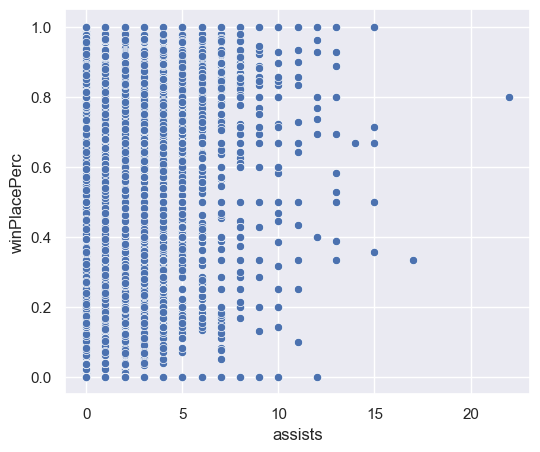

boosts


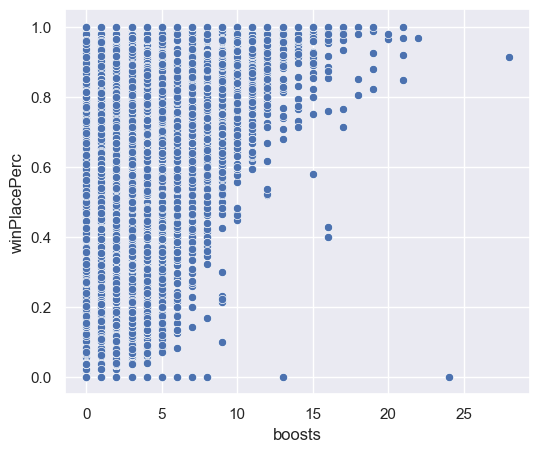

damageDealt


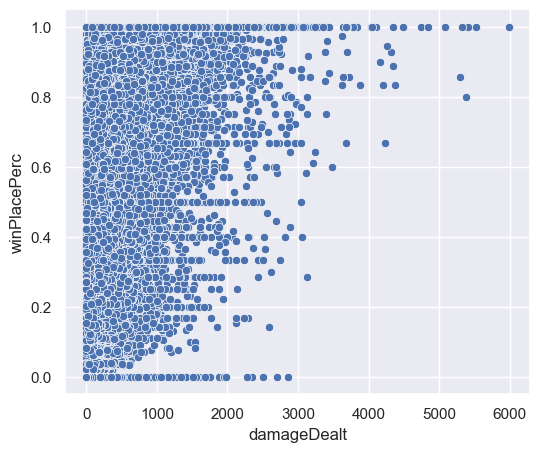

DBNOs


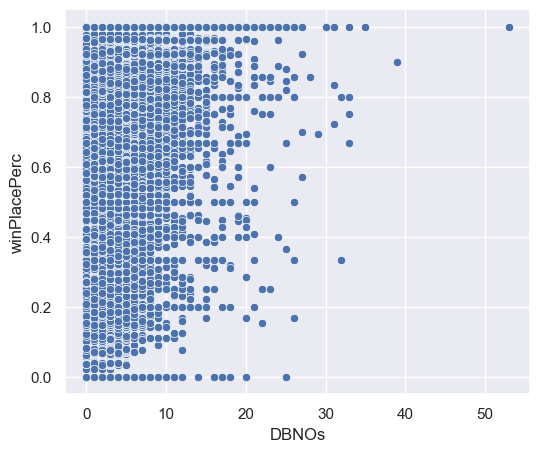

headshotKills


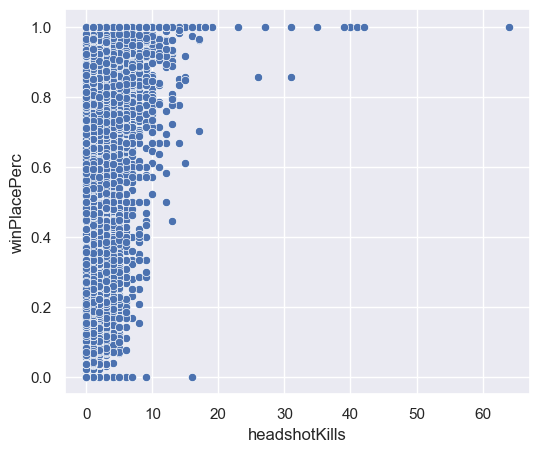

heals


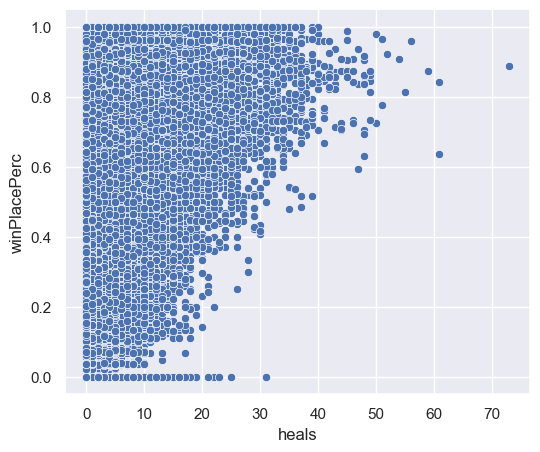

killPlace


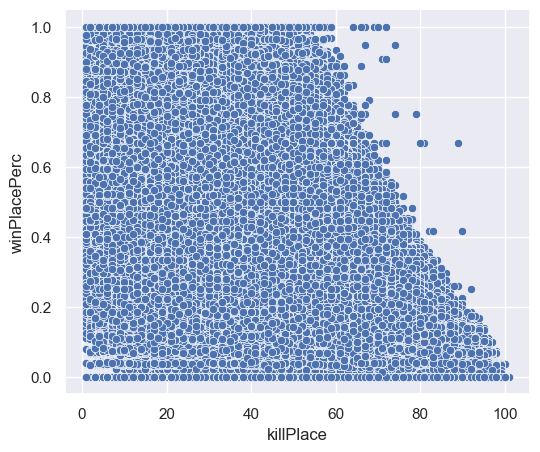

killPoints


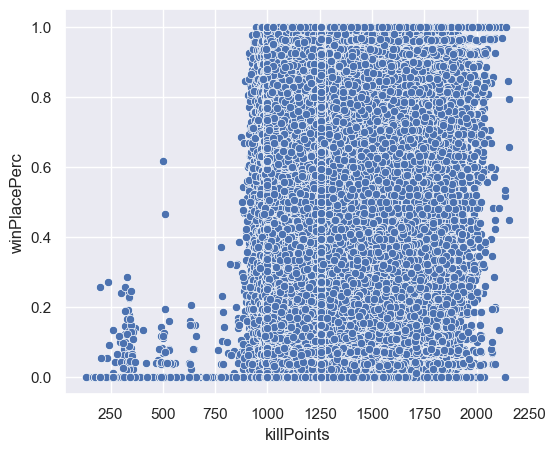

kills


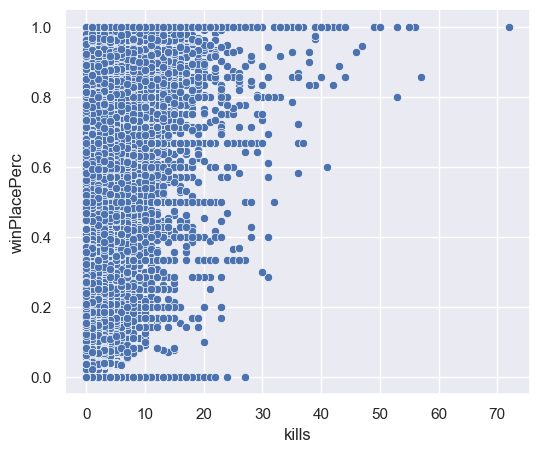

killStreaks


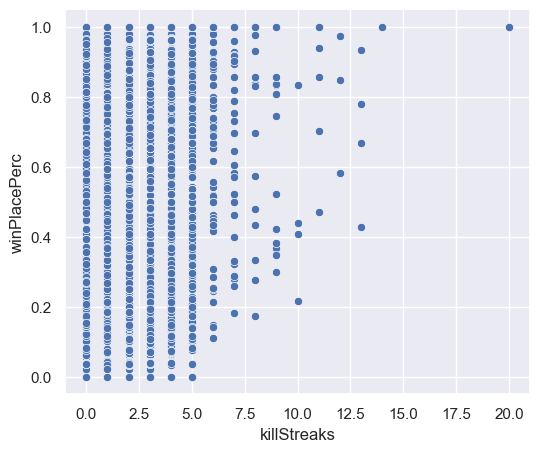

longestKill


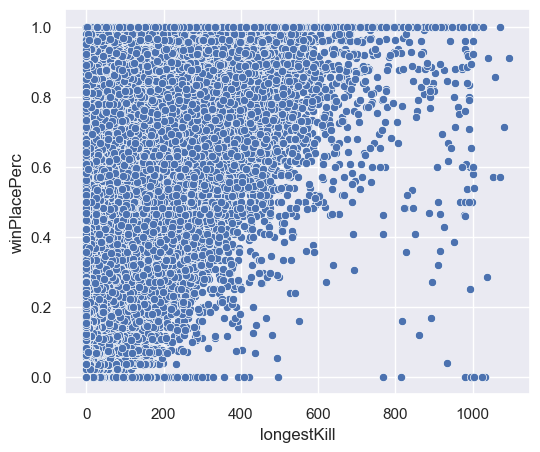

matchDuration


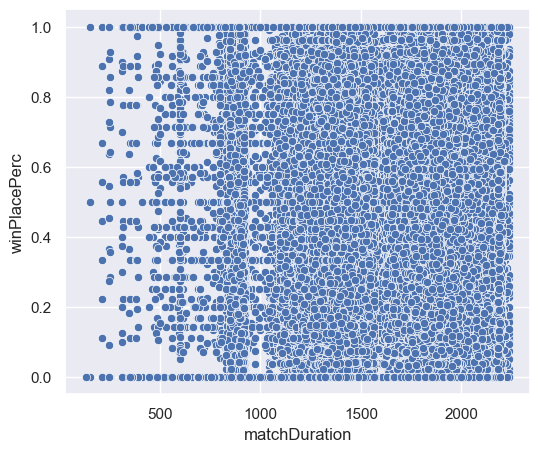

maxPlace


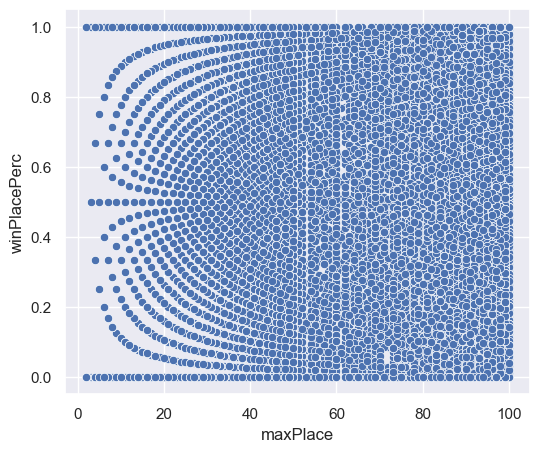

numGroups


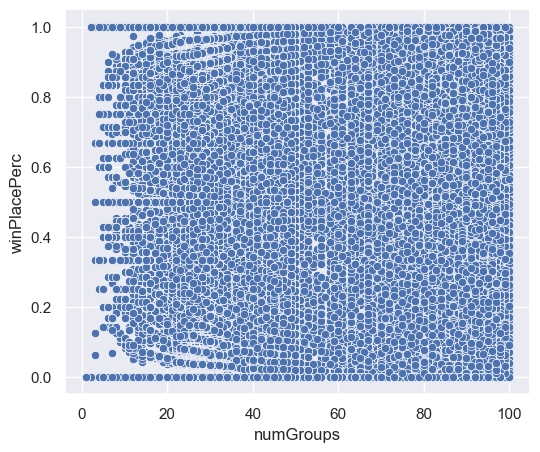

rankPoints


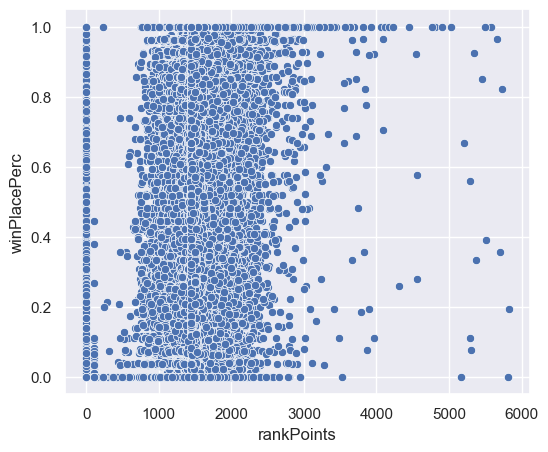

revives


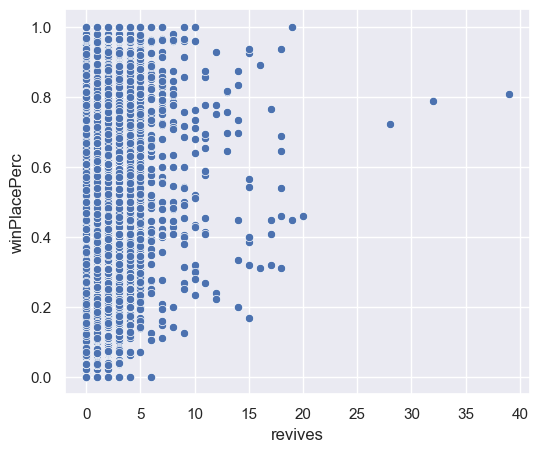

rideDistance


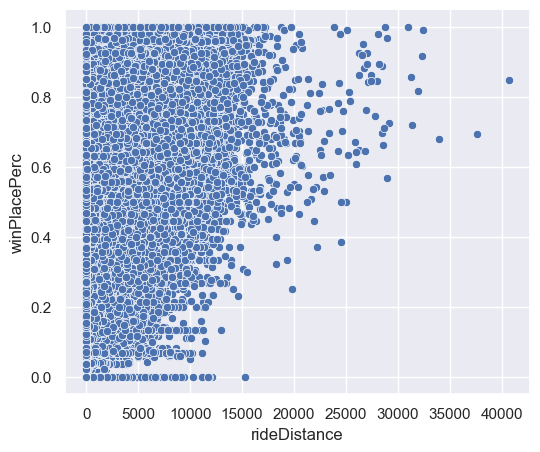

roadKills


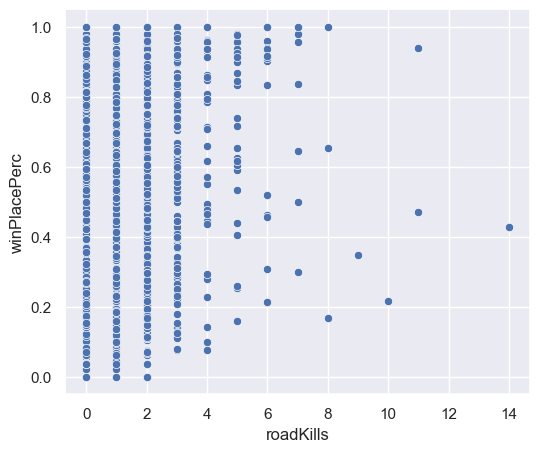

swimDistance


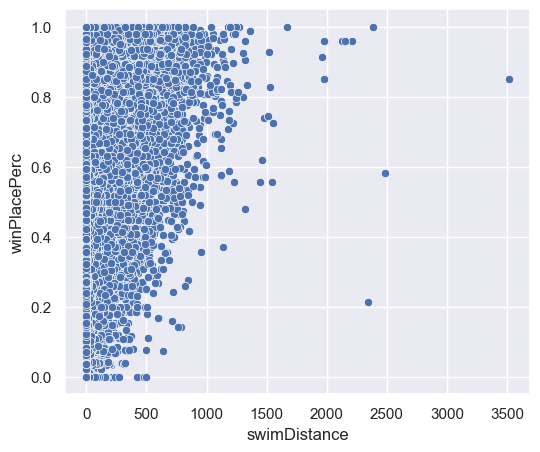

teamKills


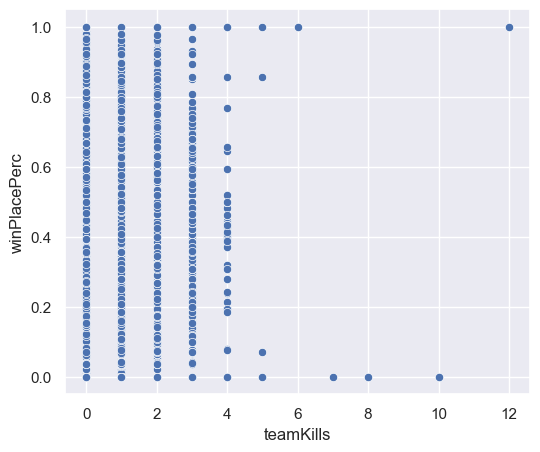

vehicleDestroys


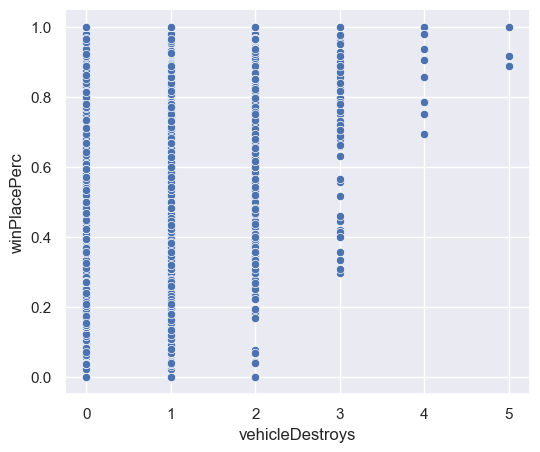

walkDistance


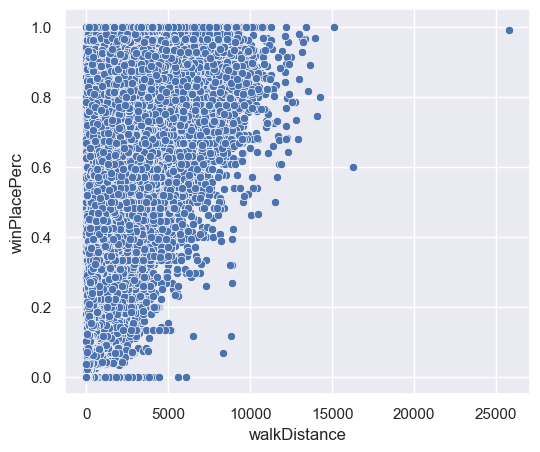

weaponsAcquired


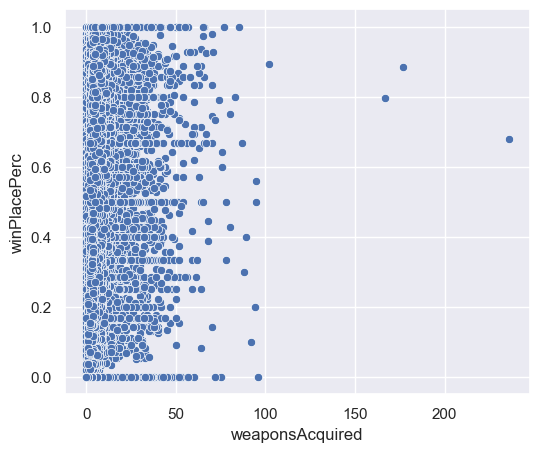

winPoints


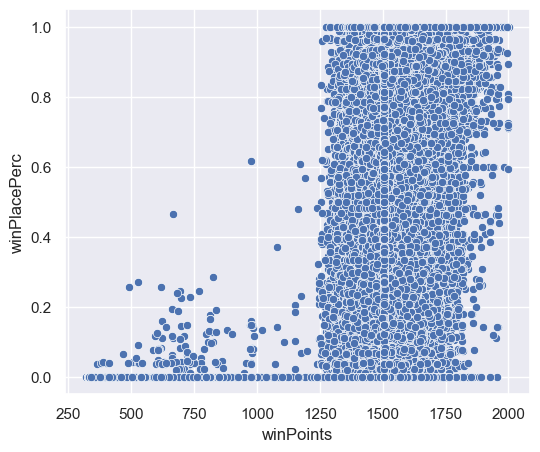

winPlacePerc


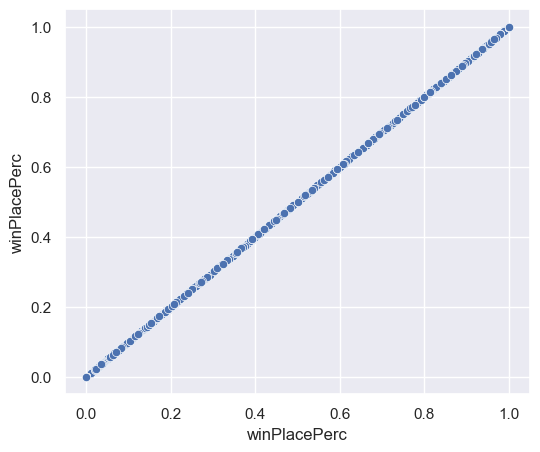

In [105]:
for i in testdfnum.columns:
    #sns.boxplot(x=testdfnum[i])
    sns.scatterplot(x=testdf[i],y=testdf["winPlacePerc"])
    print(i)
    plt.show()

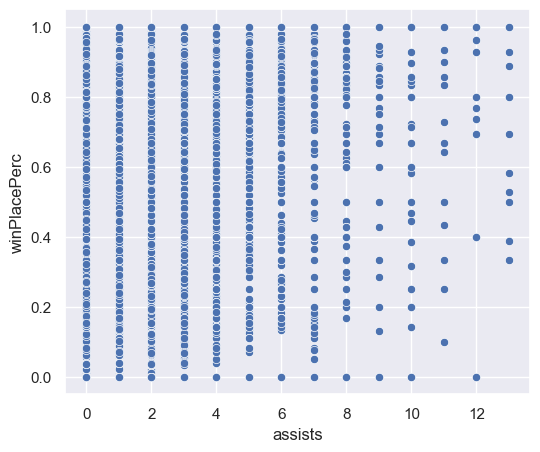

In [106]:
sns.scatterplot(x=testdf.loc[testdf["assists"]<13.7,"assists"],y=testdf["winPlacePerc"])
plt.show()
testdf=testdf.loc[testdf["assists"]<13.7]

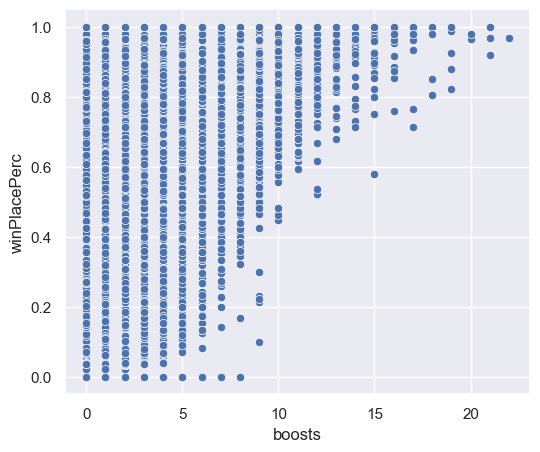

In [107]:
sns.scatterplot(x=testdf.loc[((-testdf["boosts"]+13.5*testdf["winPlacePerc"])>-9),"boosts"],y=testdf["winPlacePerc"])
plt.show()
testdf=testdf.loc[((-testdf["boosts"]+13.5*testdf["winPlacePerc"])>-9)]

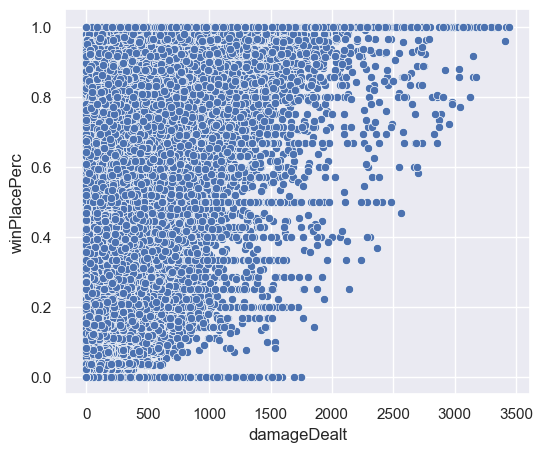

In [108]:
sns.scatterplot(x=testdf.loc[((-testdf["damageDealt"]+1750*testdf["winPlacePerc"]>-1750)),"damageDealt"],y=testdf["winPlacePerc"])
plt.show()
testdf=testdf.loc[((-testdf["damageDealt"]+1750*testdf["winPlacePerc"]>-1750))]

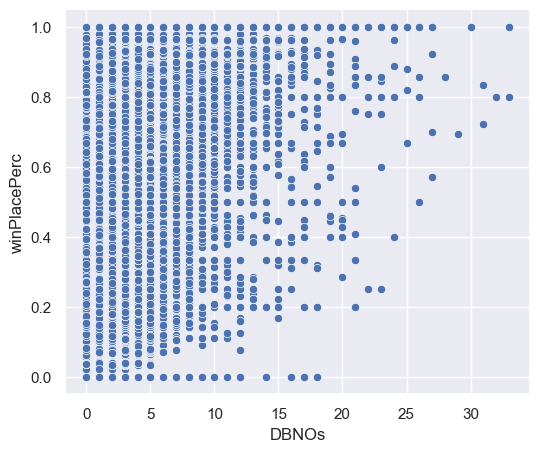

In [109]:
sns.scatterplot(x=testdf.loc[((20*testdf["winPlacePerc"]-testdf["DBNOs"]>-25)&(testdf["DBNOs"]<35)),"DBNOs"],y=testdf["winPlacePerc"])
plt.show()
testdf=testdf.loc[((20*testdf["winPlacePerc"]-testdf["DBNOs"]>-25)&(testdf["DBNOs"]<35))]

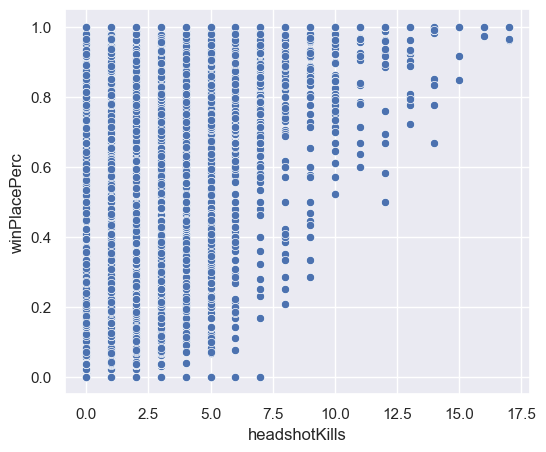

In [110]:
sns.scatterplot(x=testdf.loc[(-testdf["headshotKills"]+10.5*testdf["winPlacePerc"]>-7.5),"headshotKills"],y=testdf["winPlacePerc"])
plt.show()
testdf=testdf.loc[(-testdf["headshotKills"]+10.5*testdf["winPlacePerc"]>-7.5)]

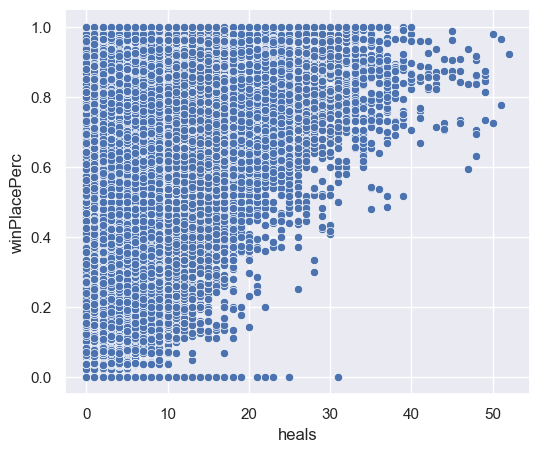

In [111]:
sns.scatterplot(x=testdf.loc[testdf["heals"]<52.5,"heals"],y=testdf["winPlacePerc"])
plt.show()
testdf=testdf.loc[testdf["heals"]<52.5]

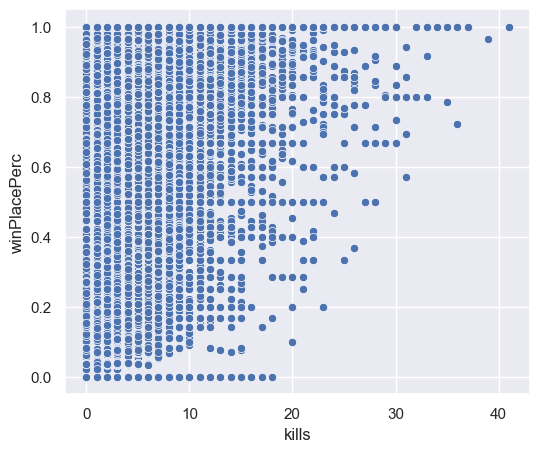

In [112]:
sns.scatterplot(x=testdf.loc[testdf["kills"]<44.5,"kills"],y=testdf["winPlacePerc"])
plt.show()
testdf=testdf.loc[testdf["kills"]<44.5]

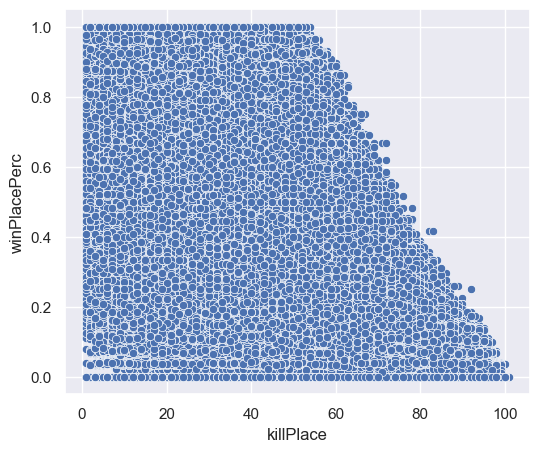

In [113]:
sns.scatterplot(x=testdf.loc[(7*testdf["killPlace"]+400*testdf["winPlacePerc"]<780),"killPlace"],y=testdf["winPlacePerc"])
plt.show()
testdf=testdf.loc[(7*testdf["killPlace"]+400*testdf["winPlacePerc"]<780)]

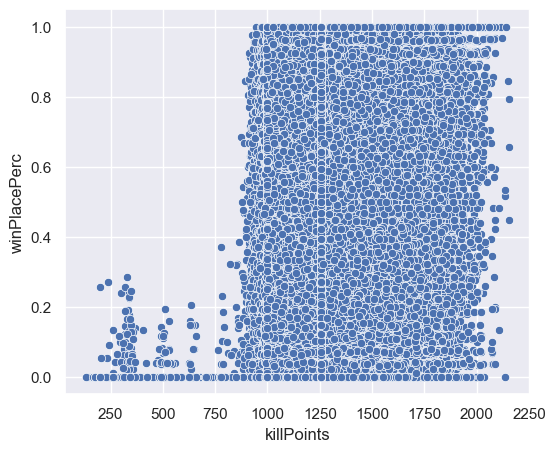

In [114]:
sns.scatterplot(x=testdf.loc[((testdf["killPoints"]>750)|(testdf["winPlacePerc"]<0.42)),"killPoints"],y=testdf["winPlacePerc"])
plt.show()
testdf=testdf.loc[((testdf["killPoints"]>750)|(testdf["winPlacePerc"]<0.42))]

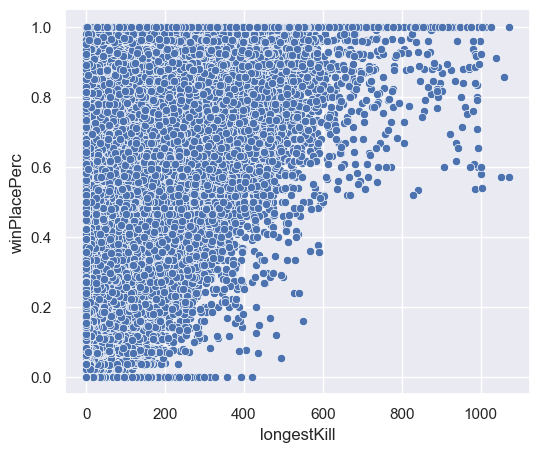

In [115]:
sns.scatterplot(x=testdf.loc[((testdf["longestKill"]<1075)&((testdf["longestKill"]<600)|(testdf["winPlacePerc"]>0.5))),"longestKill"],y=testdf["winPlacePerc"])
plt.show()
testdf=testdf.loc[((testdf["longestKill"]<1075)&((testdf["longestKill"]<600)|(testdf["winPlacePerc"]>0.5)))]

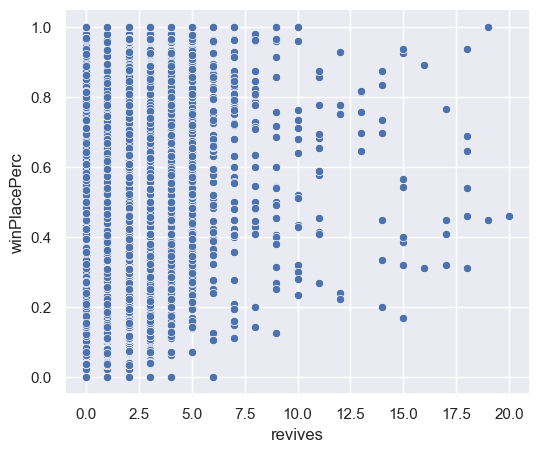

In [116]:
sns.scatterplot(x=testdf.loc[testdf["revives"]<22.5,"revives"],y=testdf["winPlacePerc"])
plt.show()
testdf=testdf.loc[testdf["revives"]<22.5]

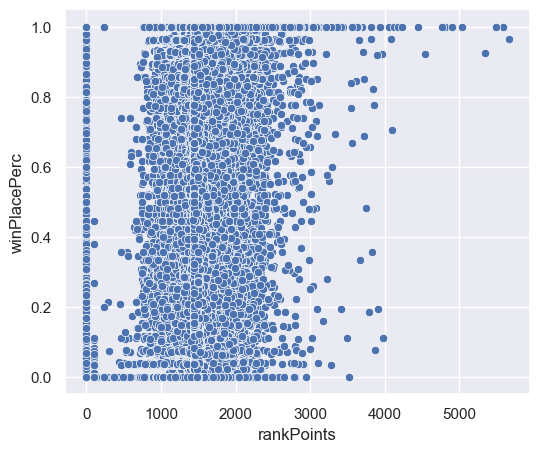

In [117]:
sns.scatterplot(x=testdf.loc[((testdf["rankPoints"]<4200)|(testdf["winPlacePerc"]>0.88)),"rankPoints"],y=testdf["winPlacePerc"])
plt.show()
testdf=testdf.loc[((testdf["rankPoints"]<4200)|(testdf["winPlacePerc"]>0.88))]

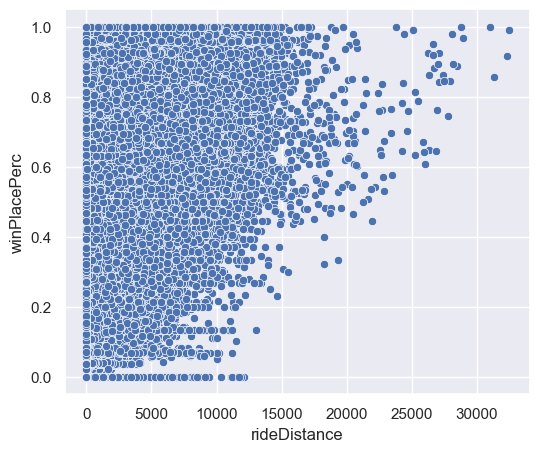

In [118]:
sns.scatterplot(x=testdf.loc[-testdf["rideDistance"]+22000*testdf["winPlacePerc"]>-13000,"rideDistance"],y=testdf["winPlacePerc"])
plt.show()
testdf=testdf.loc[-testdf["rideDistance"]+22000*testdf["winPlacePerc"]>-13000]

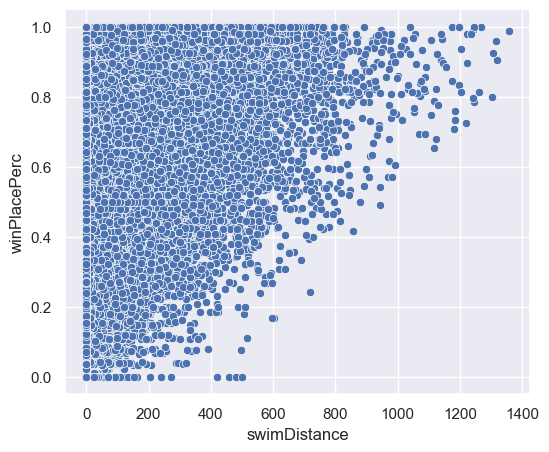

In [119]:
sns.scatterplot(x=testdf.loc[-testdf["swimDistance"]+975*testdf["winPlacePerc"]>-525,"swimDistance"],y=testdf["winPlacePerc"])
plt.show()
testdf=testdf.loc[-testdf["swimDistance"]+975*testdf["winPlacePerc"]>-525]

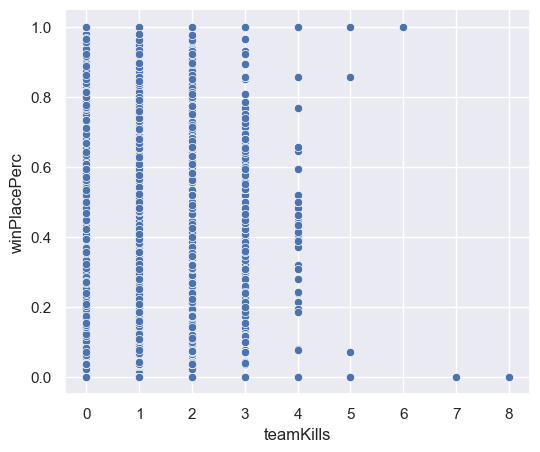

In [120]:
sns.scatterplot(x=testdf.loc[testdf["teamKills"]<8.5,"teamKills"],y=testdf["winPlacePerc"])
plt.show()
testdf=testdf.loc[testdf["teamKills"]<8.5]

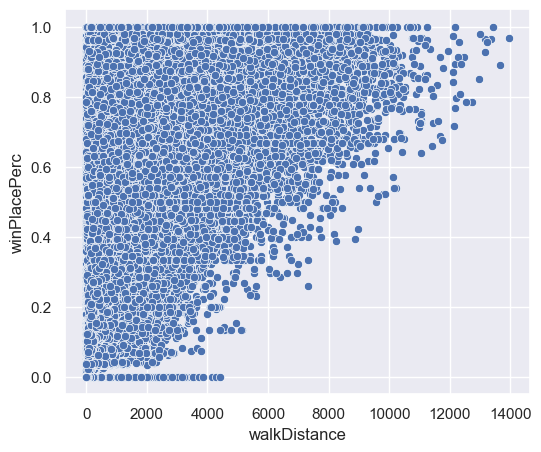

In [121]:
sns.scatterplot(x=testdf.loc[(-testdf["walkDistance"]+10000*testdf["winPlacePerc"]>-5000),"walkDistance"],y=testdf["winPlacePerc"])
plt.show()
testdf=testdf.loc[(-testdf["walkDistance"]+10000*testdf["winPlacePerc"]>-5000)]

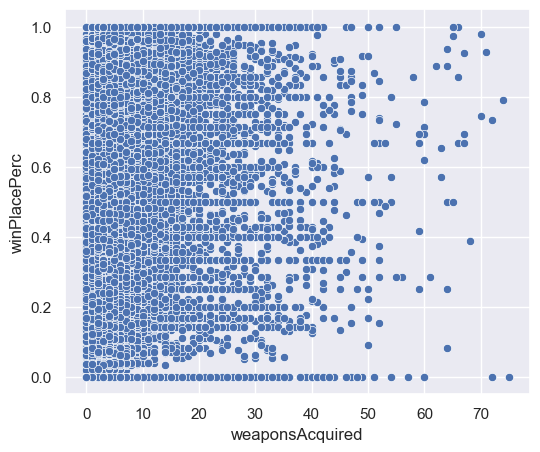

In [122]:
sns.scatterplot(x=testdf.loc[testdf["weaponsAcquired"]<80,"weaponsAcquired"],y=testdf["winPlacePerc"])
plt.show()
testdf=testdf.loc[testdf["weaponsAcquired"]<80]

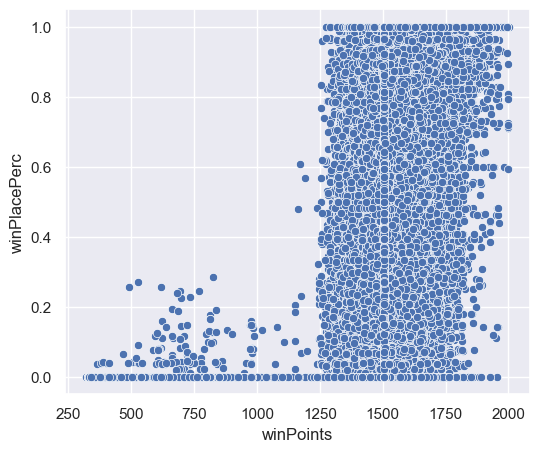

In [123]:
sns.scatterplot(x=testdf.loc[((testdf["winPoints"]>1100)|(testdf["winPlacePerc"]<0.32)),"winPoints"],y=testdf["winPlacePerc"])
plt.show()
testdf=testdf.loc[((testdf["winPoints"]>1100)|(testdf["winPlacePerc"]<0.32))]

In [124]:
testdf

Id  groupId  matchId  assists  boosts  damageDealt  DBNOs  \
0        2489947   645364     1976        0       1       186.00      0   
1        1412740   311343    13894        0       4       353.80      2   
2         628654   580803    15093        0       0         0.00      0   
3         740829   181474     4360        0       0         0.00      0   
4        2262435   816158    39502        0       0       119.70      2   
...          ...      ...      ...      ...     ...          ...    ...   
2979462  2925478  1577648    24994        0       8        29.83      0   
2979463  2918097   114277    24762        0       1         0.00      0   
2979464  1296258  1050496    26575        0       0         0.00      0   
2979465  1598131   195710    45357        0       1       386.20      1   
2979466  1720932  1618330    33060        0       0        50.31      0   

         headshotKills  heals  killPlace  ...  revives  rideDistance  \
0                    0      0         43  ...        0          0.00   
1                    1      7          4  ...        1       1877.00   
2                    0      1         65  ...        0          0.00   
3                    0      0         85  ...        0          0.00   
4                    0      0         18  ...        0          0.00   
...                ...    ...        ...  ...      ...           ...   
2979462              0      2         41  ...        0          0.00   
2979463              0      4         61  ...        0         86.49   
2979464              0      0         84  ...        0          0.00   
2979465              0      1          9  ...        0          0.00   
2979466              0      0         48  ...        0          0.00   

         roadKills  swimDistance  teamKills  vehicleDestroys  walkDistance  \
0                0           0.0          0                0         74.32   
1                0           0.0          0                0       1732.00   
2                0           0.0          0                0         75.47   
3                0           0.0          0                0        153.50   
4                0           0.0          0                0        194.20   
...            ...           ...        ...              ...           ...   
2979462          0           0.0          0                0       2052.00   
2979463          0           0.0          0                0       1053.00   
2979464          0           0.0          0                0          0.00   
2979465          0           0.0          0                0       2026.00   
2979466          0         181.5          0                0       1676.00   

         weaponsAcquired    winPoints  winPlacePerc  
0                      2  1505.571296        0.2604  
1                      4  1505.571296        0.7045  
2                      1  1694.000000        0.2692  
3                      2  1505.571296        0.1034  
4                      4  1505.571296        0.1923  
...                  ...          ...           ...  
2979462                5  1505.571296        0.9231  
2979463                3  1505.571296        0.4211  
2979464                0  1505.571296        0.0000  
2979465                6  1505.571296        0.7111  
2979466                5  1505.571296        0.8125  

[2979161 rows x 29 columns]

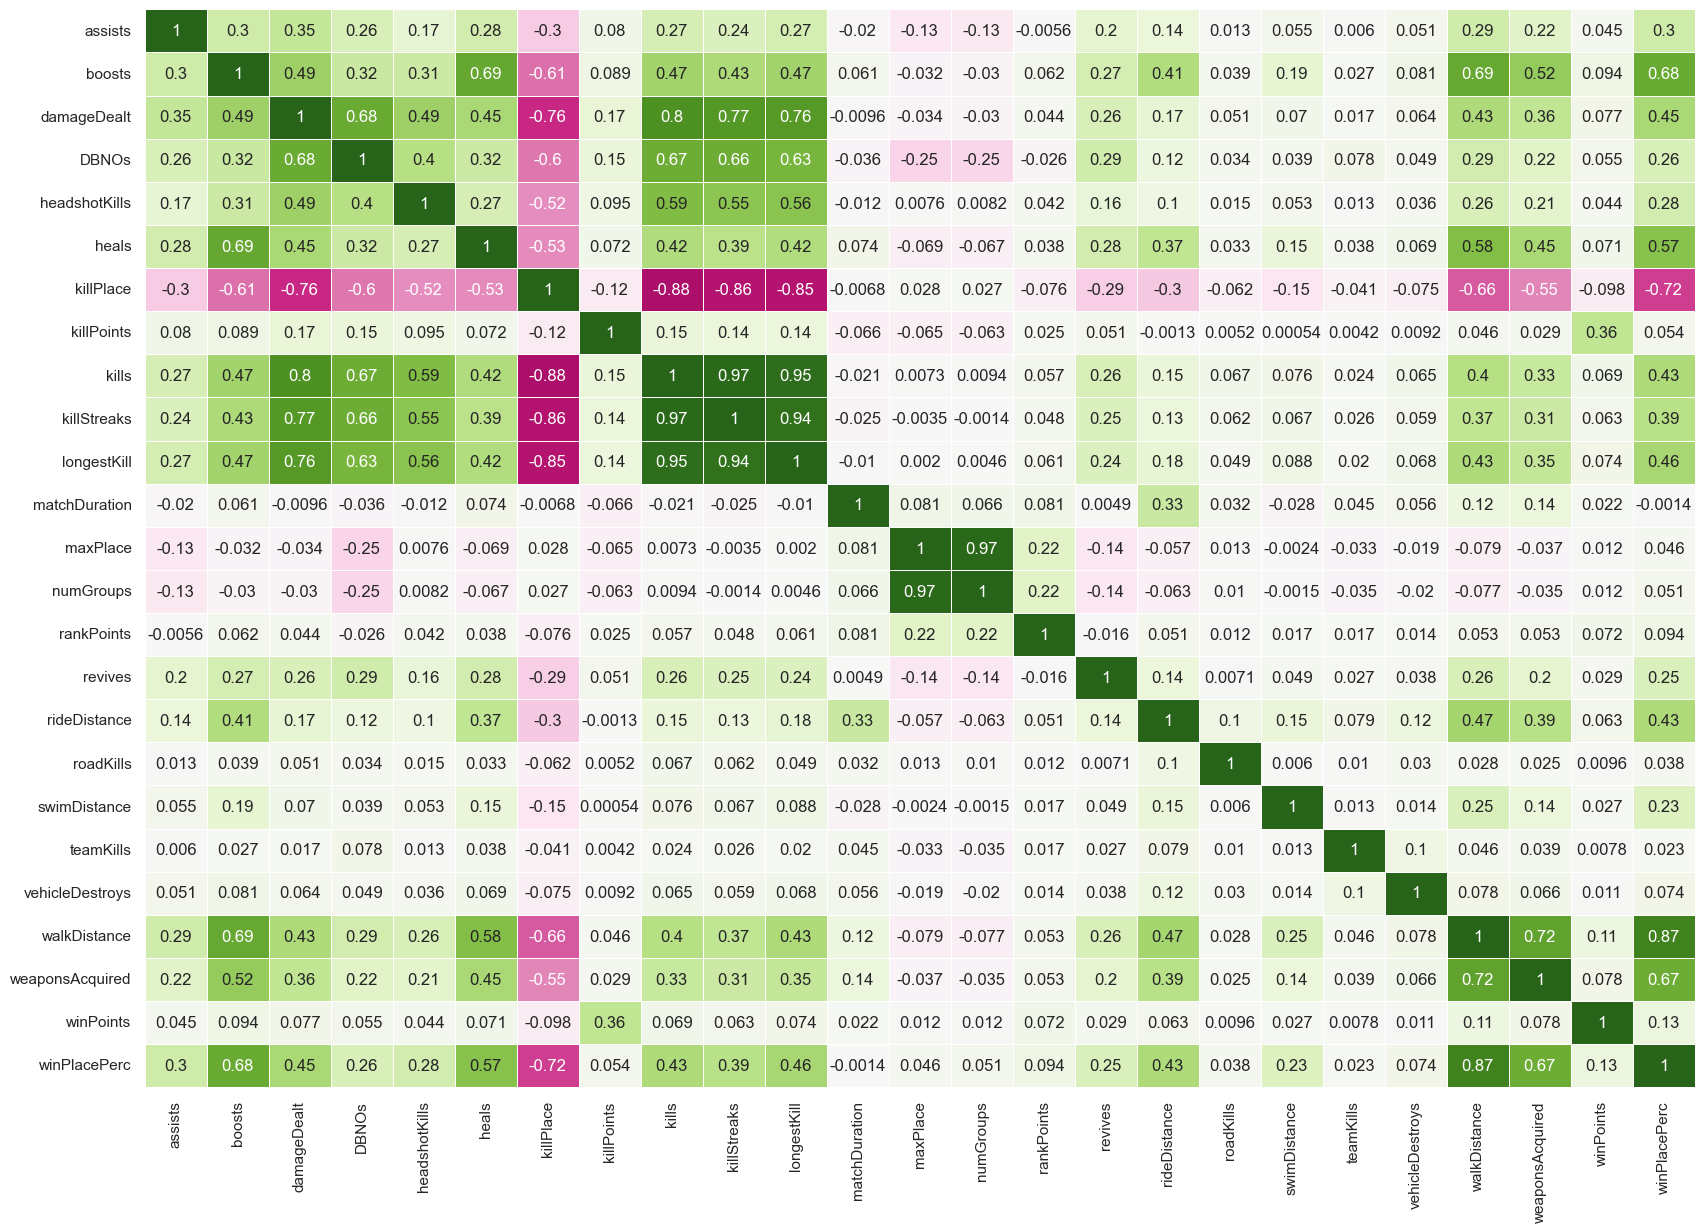

In [125]:
sns.set(rc={'figure.figsize':(20,14)})
testdfnum=testdf.drop(axis="columns",labels=testdfcat.columns.to_list())
sns.heatmap(testdfnum.corr(method="spearman"),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="PiYG")
plt.show()
sns.set(rc={'figure.figsize':(6,5)})

In [126]:
#testdf.drop(axis="columns",labels=["killPoints","kills","matchDuration","maxPlace","numGroups","rankPoints","roadKills","teamKills","vehicleDestroys","winPlace"],inplace=True)
testdf.drop(axis="columns",labels=["damageDealt","killPoints","kills","killStreaks","longestKill","maxPlace"],inplace=True)
testdf.drop(axis="columns",labels=["matchDuration","numGroups","rankPoints","roadKills","teamKills","vehicleDestroys","winPoints"],inplace=True)

In [127]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [128]:
testdfcat=pd.DataFrame()
testdfcat["matchId"]=testdf["matchId"]
testdfcat["Id"]=testdf["Id"]
testdfcat["groupId"]=testdf["groupId"]
testdfcat["matchType"]=testdf["matchType"]
testdfcat.head()

matchId       Id  groupId  matchType
0     1976  2489947   645364         13
1    13894  1412740   311343          2
2    15093   628654   580803         14
3     4360   740829   181474         15
4    39502  2262435   816158         15

In [129]:
cramers_v(testdfcat["matchId"],testdfcat["matchType"])

0.9919202513554535

In [130]:
cramers_v(testdfcat["groupId"],testdfcat["matchType"])

0.6599660352426837

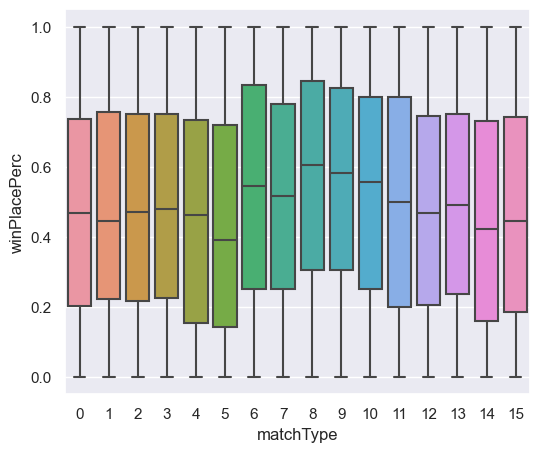

In [131]:
sns.boxplot(x=testdf["matchType"],y=testdf["winPlacePerc"])
plt.show()

In [132]:
testdf.drop(axis="columns",labels=["matchId","Id"],inplace=True)
testdfnum=testdf.drop(axis="columns",labels=["groupId","matchType"])

In [3]:
df.shape

NameError: name 'df' is not defined

In [134]:
for i in testdfnum.columns:
    normcol=testdf[i]
    scaler=Standardizer(normcol.mean(),normcol.std())
    scaledcol=normcol.apply(scaler.scale)
    #print(i)
    #sns.displot(scaledcol,kde=True)
    #plt.show()
    testdf[i]=scaledcol    

In [135]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import random

Splitting the data set

In [2]:
arr = df.to_numpy().astype(np.float64)

NameError: name 'df' is not defined

In [137]:
random.shuffle(arr)

In [1]:
df.shape

NameError: name 'df' is not defined